In [8]:
import numpy as np

def power_iteration(A, num_iterations=1000, tol=1e-6):
    # 初始化随机向量
    b = np.random.rand(A.shape[1])
    b = b / np.linalg.norm(b)
    
    # power iteration 循环
    for _ in range(num_iterations):
        # 计算新的 b 向量
        b_new = np.dot(A, b)
        # 归一化
        b_new = b_new / np.linalg.norm(b_new)
        
        # 检查收敛性
        if np.linalg.norm(b_new - b) < tol:
            break
            
        b = b_new
    
    # 计算特征值
    eigenvalue = np.dot(b.T, np.dot(A, b))
    
    return eigenvalue

# 示例矩阵
A1 = np.array([[10, -12, -6], [5, -5, -4], [-1, 0, 3]])
A2 = np.array([[-14, 20, 10], [-19, 27, 12], [23, -32, -13]])
A3 = np.array([[8, -8, -4], [12, -15, -7], [-18, 26, 12]])

# 计算最大的特征值
max_eigenvalue = power_iteration(A1)
print("矩阵的绝对值最大的特征值:", max_eigenvalue)

max_eigenvalue = power_iteration(A2)
print("矩阵的绝对值最大的特征值:", max_eigenvalue)

max_eigenvalue = power_iteration(A3)
print("矩阵的绝对值最大的特征值:", max_eigenvalue)



矩阵的绝对值最大的特征值: 4.000004258519832
矩阵的绝对值最大的特征值: -4.000000000000017
矩阵的绝对值最大的特征值: 4.000001080690647


In [9]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

def inverse_power_iteration(A, num_iterations=1000, tol=1e-6):
    # LU 分解
    lu, piv = lu_factor(A)
    
    # 初始化随机向量
    b = np.random.rand(A.shape[1])
    b = b / np.linalg.norm(b)
    
    # 逆 power iteration 循环
    for _ in range(num_iterations):
        # 通过解线性方程组 A * x = b 实现对逆矩阵的迭代
        b_new = lu_solve((lu, piv), b)
        # 归一化
        b_new = b_new / np.linalg.norm(b_new)
        
        # 检查收敛性
        if np.linalg.norm(b_new - b) < tol:
            break
            
        b = b_new
    
    # 计算最小特征值
    min_eigenvalue = np.dot(b.T, np.dot(A, b))
    min_eigenvalue = 1 / min_eigenvalue  # 取倒数得到最小特征值
    
    return min_eigenvalue

A1 = np.array([[10, -12, -6], [5, -5, -4], [-1, 0, 3]])
A2 = np.array([[-14, 20, 10], [-19, 27, 12], [23, -32, -13]])
A3 = np.array([[8, -8, -4], [12, -15, -7], [-18, 26, 12]])

# 计算绝对值最小的特征值
min_eigenvalue = inverse_power_iteration(A1)
print("矩阵的绝对值最小的特征值:", min_eigenvalue)

min_eigenvalue = inverse_power_iteration(A2)
print("矩阵的绝对值最小的特征值:", min_eigenvalue)

min_eigenvalue = inverse_power_iteration(A3)
print("矩阵的绝对值最小的特征值:", min_eigenvalue)


矩阵的绝对值最小的特征值: 1.0000003433432174
矩阵的绝对值最小的特征值: 1.0000003085421554
矩阵的绝对值最小的特征值: -0.9999999999999991


In [10]:
import numpy as np
from scipy.stats import t

# Sample data
sample_data = np.array([914, 920, 910, 934, 953, 945, 912, 924, 940])

# Known parameters
mu_0 = 950  # Hypothesized population mean
sigma = 10  # Population standard deviation
n = len(sample_data)

# Sample statistics
sample_mean = np.mean(sample_data)
standard_error = sigma / np.sqrt(n)

# t-statistic calculation
t_statistic = (sample_mean - mu_0) / standard_error

# p-value calculation (one-tailed test)
p_value = t.cdf(t_statistic, df=n-1)

sample_mean, t_statistic, p_value


(928.0, -6.6, 8.469328690107132e-05)

In [2]:
# 计算lst中存的prob的熵
import numpy as np

def entropy(prob):
    return -np.sum(prob * np.log2(prob))

In [3]:
lst = [3/4, 1/4]
entropy(lst)

0.8112781244591328

In [1]:
print(pow(9,1/3))

2.080083823051904


In [7]:
# 迭代x_{n+1} = 2/3 * x_n + 3/x_n^2
def iterative(x0, num_iterations=1000, tol=1e-6):
    for _ in range(num_iterations):
        # x1 = 2/3 * x0 + 3 / x0**2
        x1 = 3 / np.sqrt(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return x1, _

x0 = 1
root, num_iterations = iterative(x0)
root, num_iterations

(2.08008400466374, 22)

In [10]:
# SVD分解A = U * S * V^T
# 计算过程

import numpy as np

def svd_decomposition(A):
    # 计算 A^T * A 的特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eig(np.dot(A.T, A))
    
    # 计算奇异值
    singular_values = np.sqrt(eigenvalues)
    
    # 对奇异值进行排序
    idx = np.argsort(singular_values)[::-1] # 逆序，从大到小
    singular_values = singular_values[idx] # 重新排列奇异值
    eigenvectors = eigenvectors[:, idx] # 重新排列特征向量
    
    # 计算 V
    V = eigenvectors
    
    # 计算 U
    U = np.zeros((A.shape[0], A.shape[0]))
    for i in range(A.shape[0]):
        U[:, i] = np.dot(A, V[:, i]) / singular_values[i]
    
    return U, singular_values, V

A = np.array([[3, 1], [1, 3]])
U, S, V = svd_decomposition(A)
U, S, V

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([4., 2.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [ ]:
# 矩阵乘法
import numpy as np

def matrix_multiplication(A, B):
    # A 的列数必须等于 B 的行数
    assert A.shape[1] == B.shape[0]
    
    # 初始化结果矩阵
    result = np.zeros((A.shape[0], B.shape[1]))
    
    # 矩阵乘法
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            result[i, j] = np.dot(A[i, :], B[:, j])
    
    return result

# A = np.array([[1, 2], [3, 4], [5, 6]])

In [3]:
! pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
a = -0.8
b = 0.6
Delta_3 = 0.8
delta_3 = 1.2
m = 0.2
n = -0.4

(1-1/b)*delta_3, (1+(m-b)/(b*n))*delta_3, delta_3, (1+(n-a)/(a*m))*Delta_3, (1-1/a)*Delta_3, Delta_3

(-0.8, 3.1999999999999997, 1.2, -1.1999999999999997, 1.8, 0.8)

In [7]:
def cal(a, b):
    return (a+b)/2, (b-a)/2

cal(-0.022, -0.019)

(-0.020499999999999997, 0.0014999999999999996)

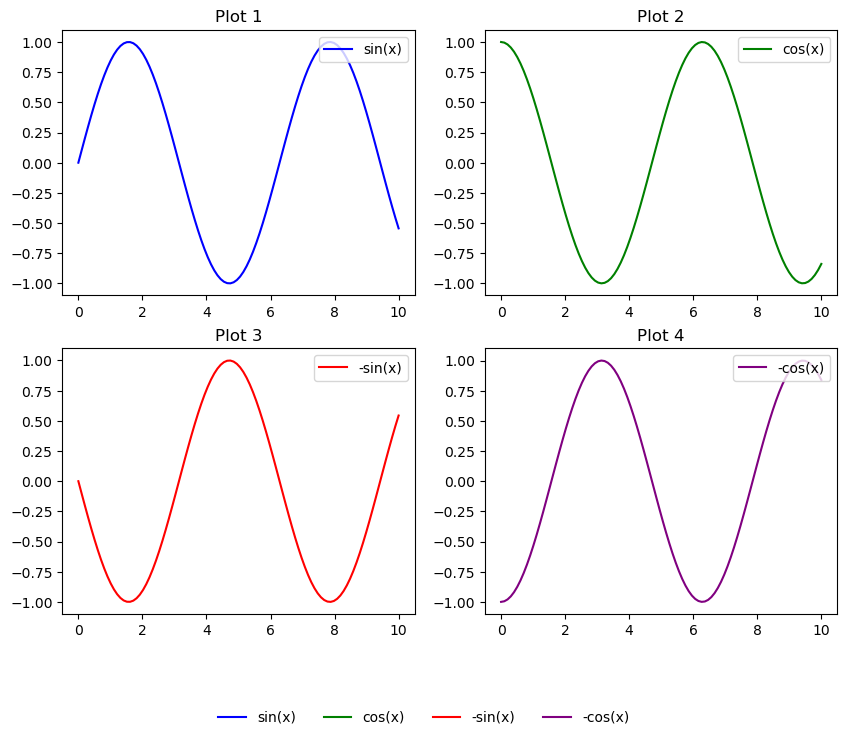

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 创建示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 设置子图布局
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 绘制子图
axs[0, 0].plot(x, y1, label="sin(x)", color="blue")
axs[0, 0].set_title("Plot 1")
axs[0, 0].legend(loc="upper right")

axs[0, 1].plot(x, y2, label="cos(x)", color="green")
axs[0, 1].set_title("Plot 2")
axs[0, 1].legend(loc="upper right")

axs[1, 0].plot(x, -y1, label="-sin(x)", color="red")
axs[1, 0].set_title("Plot 3")
axs[1, 0].legend(loc="upper right")

axs[1, 1].plot(x, -y2, label="-cos(x)", color="purple")
axs[1, 1].set_title("Plot 4")
axs[1, 1].legend(loc="upper right")

# 添加整体图例
lines, labels = [], []
for ax in axs.flat:
    for line, label in zip(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1]):
        lines.append(line)
        labels.append(label)

fig.legend(lines, labels, loc="lower center", ncol=4, frameon=False)
fig.subplots_adjust(bottom=0.15)  # 调整图例位置

# 显示图形
plt.show()
